# Predict ENERGY STAR Score of a building

#### The goal is to predict the ENERGY STAR Score of a building based on historical data

ENERGY STAR score is an external benchmark for assessing the energy performance of commercial buildings. The ENERGY STAR score is expressed as a number on a simple 1 - 100 scale. First introduced in 1999, the score has been adopted by leading organizations across the United States because it offers a simple way to evaluate measured energy use, prioritize investments, and communicate relative performance across a portfolio of buildings. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Getting the Data


In [2]:
df = pd.read_csv("D:/Projects/EnergyScore/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

In [3]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


The data has 60 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

### Initial Observations 

1)  There are 60 columns and 11746 records in the dataset.


2)  The target variable is ENERGY STAR Score and the rest are independent variables.


3)  There are columns which can be broadly classified into 3 categories :


        a) The identification related columns.
        b) The location related columns.
        c) The columns representing consumption from various energy sources.     
    

4)  ENERGY STAR Score mainly depends on amount of energy consumption from different sources, hours of operation, location and the footfall. Hence, mainly on category (b) and (c) from above point.

Reference document :  https://portfoliomanager.energystar.gov/pdf/reference/ENERGY%20STAR%20Score.pdf?_gl=1*1m3bkul*_ga*MTg5OTE0NzEwNy4xNjg2MTE1NjY5*_ga_S0KJTVVLQ6*MTY4NjMzMzAyMC43LjEuMTY4NjMzMzAzMC4wLjAuMA




### Exploratory Data Analysis & Data Pre-processing

There are null values. There are also values that are "Not Available" as reflected in the sample. Hence, we will replace all "Not Available" values to null for easier analysis.

In [5]:
#Converting Not Available to NaN

df = df.replace({'Not Available': np.nan})

In [6]:
df.isnull().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

There are some columns which have more than 50% values as null. We can drop these columns.

In [7]:
#Dropping columns with more than 50% missing values

cols = df.columns

for i in cols:
    x = df[i].isnull().sum()
    if x > 6000:
        df = df.drop(columns = [i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 49 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

There are identification related columns that will not have influence on ENERGY STAR Score. These columns can also be dropped.

In [9]:
#Dropping identification and location related unnecessary columns

id_cols = ["Order","Property Id","Property Name","Parent Property Id","Parent Property Name","BBL - 10 digits",
          "NYC Building Identification Number (BIN)","Address 1 (self-reported)","NYC Borough, Block and Lot (BBL) self-reported",
          "Postal Code","Street Number","Street Name","Primary Property Type - Self Selected","Year Built",
          "Release Date","Latitude","Longitude","Community Board","Council District","Census Tract","NTA"]

df = df.drop(columns = id_cols)

As can be seen, many numerical columns are specified as object. We will convert these columns into numeric datatypes

In [10]:
# Converting object columns to numerical columns
convert_cols = ["Site EUI (kBtu/ft²)","Weather Normalized Site EUI (kBtu/ft²)","Weather Normalized Site Electricity Intensity (kWh/ft²)",
               "Weather Normalized Site Natural Gas Intensity (therms/ft²)","Weather Normalized Source EUI (kBtu/ft²)",
               "Natural Gas Use (kBtu)","Weather Normalized Site Natural Gas Use (therms)","Electricity Use - Grid Purchase (kBtu)",
               "Weather Normalized Site Electricity (kWh)","Total GHG Emissions (Metric Tons CO2e)","Direct GHG Emissions (Metric Tons CO2e)",
               "Indirect GHG Emissions (Metric Tons CO2e)","Property GFA - Self-Reported (ft²)","Water Use (All Water Sources) (kgal)",
               "Water Intensity (All Water Sources) (gal/ft²)","Source EUI (kBtu/ft²)","Largest Property Use Type - Gross Floor Area (ft²)",
               "ENERGY STAR Score"]

for i in convert_cols:
    df[i] = pd.to_numeric(df[i])


There are categorical and numerical columns. We need to separate these in order to check their influence on ENERGY STAR Score

In [11]:
# Separating numerical and categorical columns
cat_cols = df.select_dtypes(include='object').columns
cont_cols = df.select_dtypes(exclude='object').columns

We must check number of unique values in each categorical column. If there is not much variation or the majority of the records in the column are dominated by a single value, we can drop such columns as they do not have fair influence on the data.

In [12]:
#Checking for number of unique values in each categorical column

for i in cat_cols:
    print(f"Unique values in {i} are {len(df[i].unique())}")

Unique values in Borough are 6
Unique values in List of All Property Use Types at Property are 813
Unique values in Largest Property Use Type are 54
Unique values in Metered Areas (Energy) are 8
Unique values in Metered Areas  (Water) are 7
Unique values in Water Required? are 3
Unique values in DOF Benchmarking Submission Status are 2


In [13]:
#Check for distribution of unique values

unique_val_cnt = ["Borough","Metered Areas (Energy)","Metered Areas  (Water)","Water Required?","DOF Benchmarking Submission Status"]

for i in unique_val_cnt:
    print(f"Distribution of unique values in {i} are \n{df[i].value_counts()}")

Distribution of unique values in Borough are 
Manhattan        5176
Brooklyn         2265
Queens           2091
Bronx            1937
Staten Island     159
Name: Borough, dtype: int64
Distribution of unique values in Metered Areas (Energy) are 
Whole Building                                                                                          11648
Another configuration                                                                                      31
Common areas only                                                                                           6
Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity               1
Tenant areas only                                                                              

As seen above, 3 columns have distribution that have a majority of more than 80% for one value. These columns will be dropped.

We can also see that among the Boroughs, Manhattan has the highest count.

In [14]:
# Dropping columns with more than 80% of the same value
df = df.drop(columns = ["Metered Areas (Energy)","Metered Areas  (Water)","DOF Benchmarking Submission Status"])

#### Relationship of features amongst one another

After removing null values from Water Required column, we will check its relation with ENERGY STAR Score

In [15]:

df = df.dropna(subset=["Water Required?","ENERGY STAR Score"])

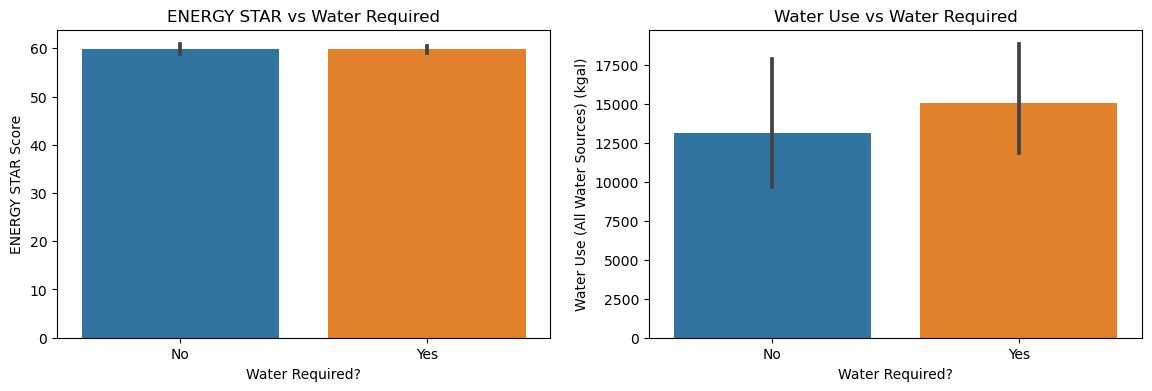

In [16]:
f,axes = plt.subplots(1,2,figsize=(14,4))

sns.barplot(x=df["Water Required?"],y=df["ENERGY STAR Score"],ax=axes[0]).set(title="ENERGY STAR vs Water Required")
sns.barplot(x=df["Water Required?"],y=df["Water Use (All Water Sources) (kgal)"],ax=axes[1]).set(title="Water Use vs Water Required")
plt.show()

As we can see, Water requirement has no impact on ENERGY STAR Score but it has a slightly higher impact on Water Usage. 

Next, we see the impact on Number of Buildings and Occupancy on the ENERGY STAR Score

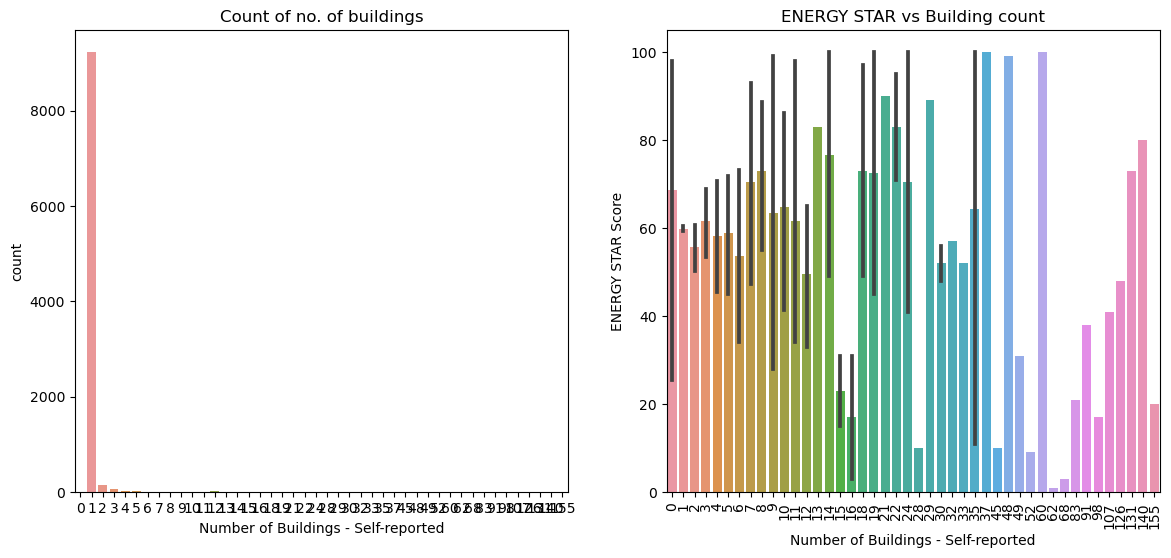

In [17]:
f,axes = plt.subplots(1,2,figsize=(14,6))

sns.countplot(x=df["Number of Buildings - Self-reported"],ax=axes[0]).set(title="Count of no. of buildings")
sns.barplot(x=df["Number of Buildings - Self-reported"],y=df["ENERGY STAR Score"],ax=axes[1]).set(title="ENERGY STAR vs Building count")
plt.xticks(rotation=90)
plt.show()



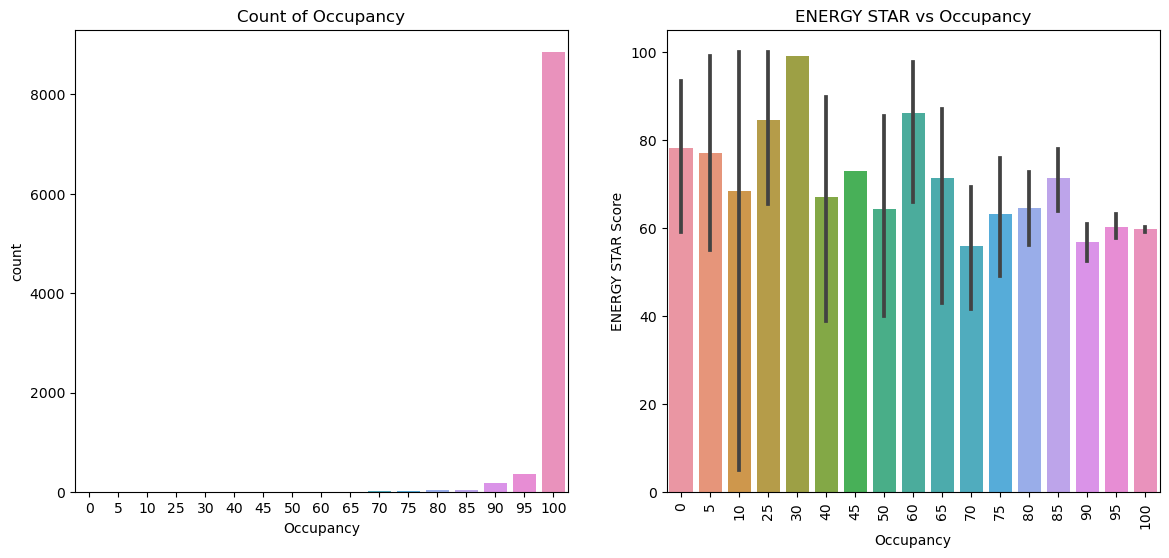

In [18]:
f,axes = plt.subplots(1,2,figsize=(14,6))

sns.countplot(x=df["Occupancy"],ax=axes[0]).set(title="Count of Occupancy")
sns.barplot(x=df["Occupancy"],y=df["ENERGY STAR Score"],ax=axes[1]).set(title="ENERGY STAR vs Occupancy")
plt.xticks(rotation=90)
plt.show()


The distribution of building Occupancy and Number of Buildings is biased. There is a majority of only one value. Also, there seems to be no discernable relationship between Occupancy and ENERGY STAR Score or Number of Buildings and ENERGY STAR Score.


There is a possibility of multicollinearity between several columns which describe power consumption patterns. To check this, we are creating a heatmap only between these columns by creating a separate dataset.

In [19]:
#Dataset for checking correlation amongst only energy columns
corr_features_cols = df.drop(columns = ["Borough","DOF Gross Floor Area","List of All Property Use Types at Property",
                    "Largest Property Use Type - Gross Floor Area (ft²)","Number of Buildings - Self-reported","Occupancy",
                   "Property GFA - Self-Reported (ft²)","Water Required?"])

<Axes: >

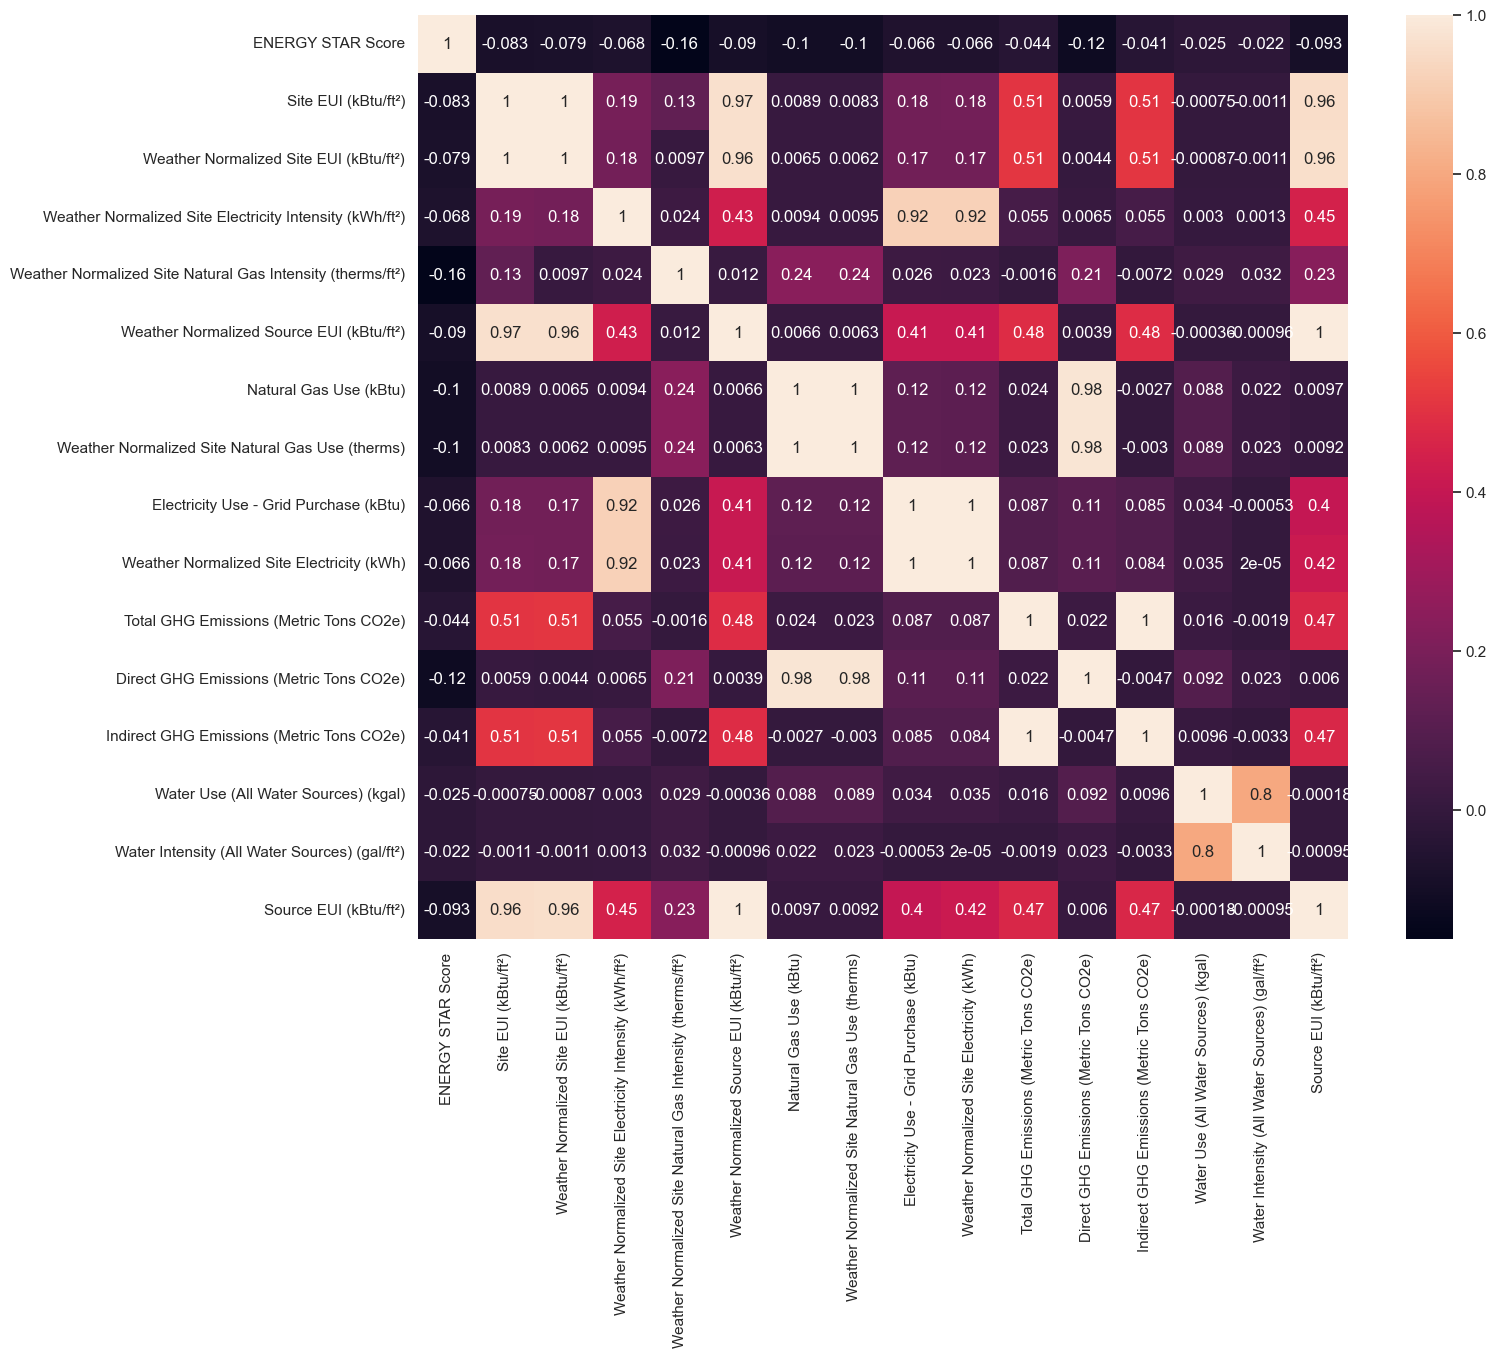

In [20]:
sns.set(rc={"figure.figsize":(15, 12)})
sns.heatmap(corr_features_cols.corr(),annot=True)

By dropping highly correlated features, i.e., correlation > 0.8, we will again check the correlation amongst remaining features.

We choose to keep Source EUI as a factor as it is the main feature for calculation of ENERGY STAR Source as per reference document.

Reference Document :https://portfoliomanager.energystar.gov/pdf/reference/Source%20Energy.pdf?_gl=1*6p1y2e*_ga*MTg5OTE0NzEwNy4xNjg2MTE1NjY5*_ga_S0KJTVVLQ6*MTY4NjM5Nzc1Mi45LjEuMTY4NjM5Nzc2Ni4wLjAuMA..

In [21]:
#ropping correlated features
corr_features_cols = corr_features_cols.drop(columns = ["Site EUI (kBtu/ft²)","Weather Normalized Site EUI (kBtu/ft²)",
                                                       "Electricity Use - Grid Purchase (kBtu)","Weather Normalized Site Electricity (kWh)",
                                                       "Weather Normalized Source EUI (kBtu/ft²)","Water Intensity (All Water Sources) (gal/ft²)",
                                                       "Indirect GHG Emissions (Metric Tons CO2e)","Direct GHG Emissions (Metric Tons CO2e)",
                                                       "Weather Normalized Site Natural Gas Use (therms)"])

<Axes: >

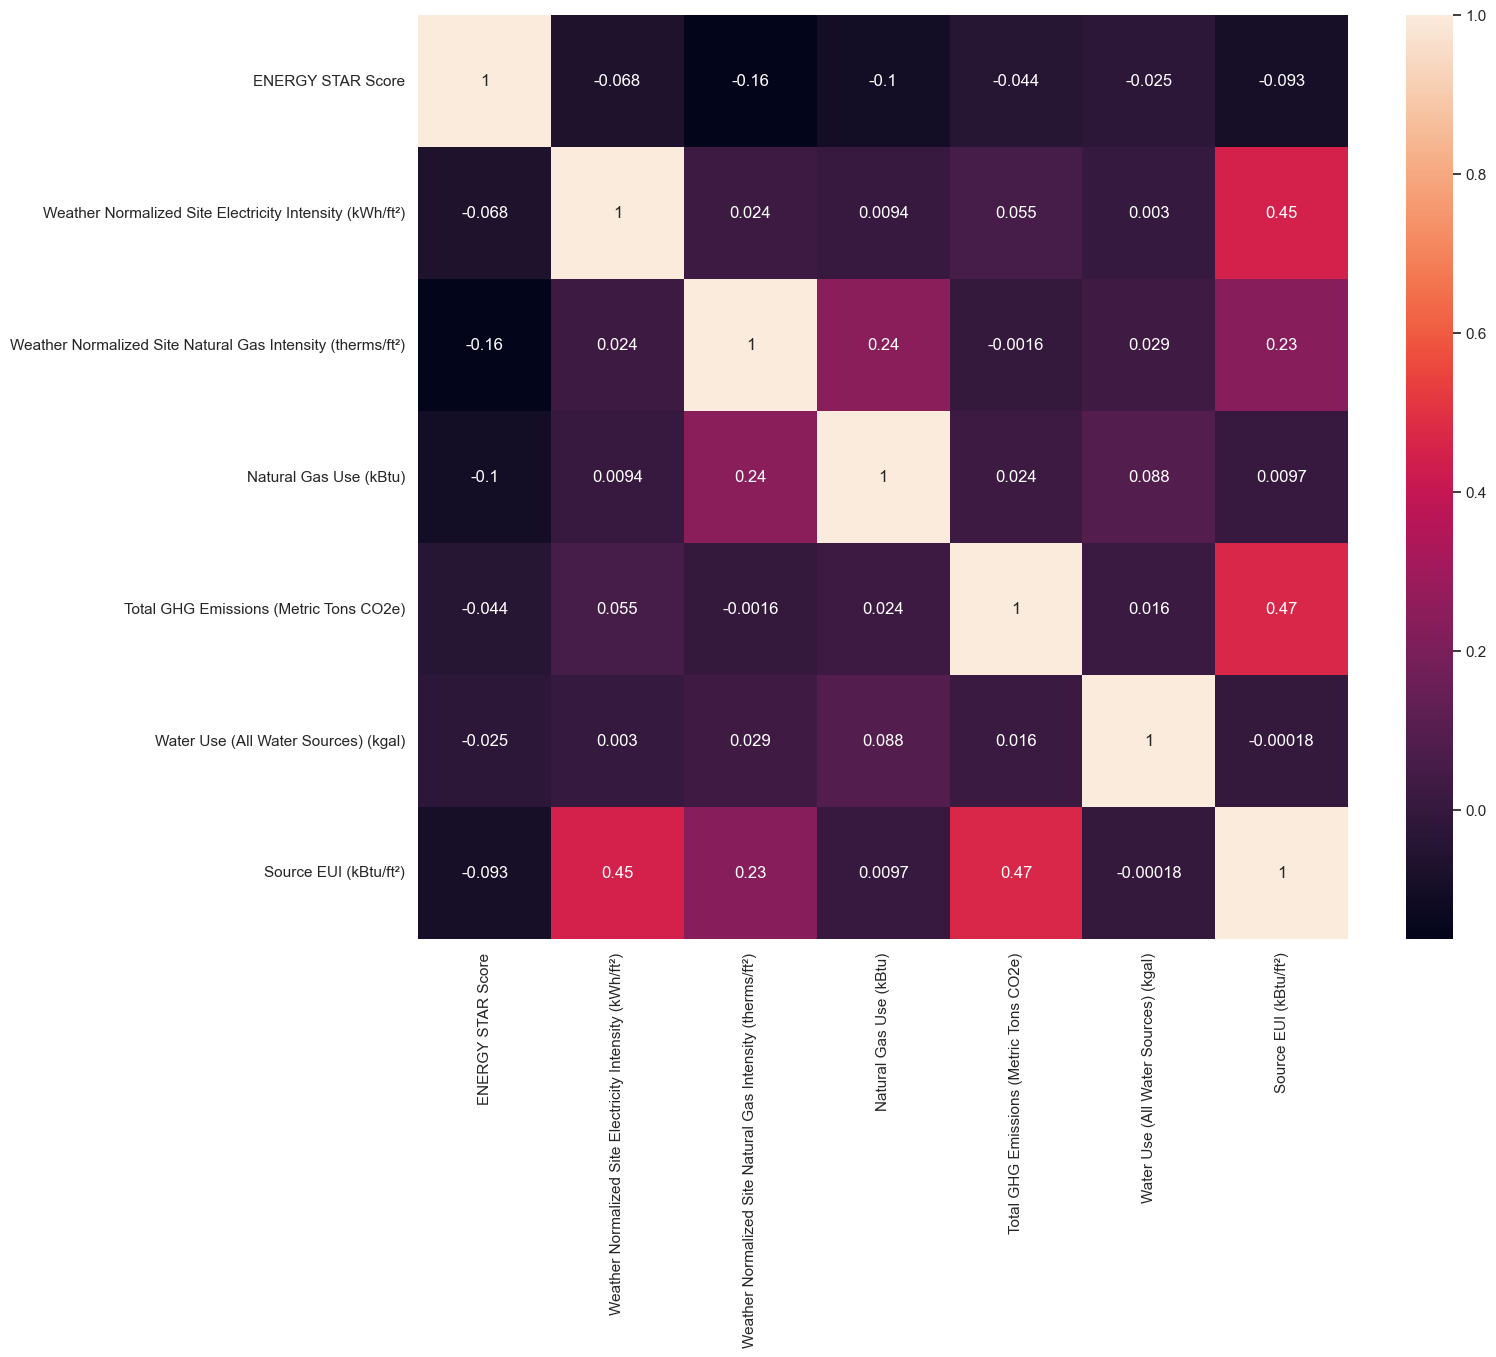

In [22]:
sns.heatmap(corr_features_cols.corr(),annot=True)

As we can see, after dropping collinear features, the heatmap now does not contain strongly correlated features any more. Now, let us add the area feature to the heatmap and check if it generates high correlation with any of the remaining features.

There is still a moderate correlation between two columns, i.e., Source EUI and Total Emissions.

In [23]:
# Creating dataset for checking correlation amongst remaining energy columns and area columns
corr_features_area= df.drop(columns = ["Borough","List of All Property Use Types at Property",
                   "Site EUI (kBtu/ft²)","Weather Normalized Site EUI (kBtu/ft²)",
                                                       "Electricity Use - Grid Purchase (kBtu)","Weather Normalized Site Electricity (kWh)",
                                                       "Weather Normalized Source EUI (kBtu/ft²)","Water Intensity (All Water Sources) (gal/ft²)",
                                                       "Indirect GHG Emissions (Metric Tons CO2e)","Direct GHG Emissions (Metric Tons CO2e)",
                                                       "Weather Normalized Site Natural Gas Use (therms)"])

<Axes: >

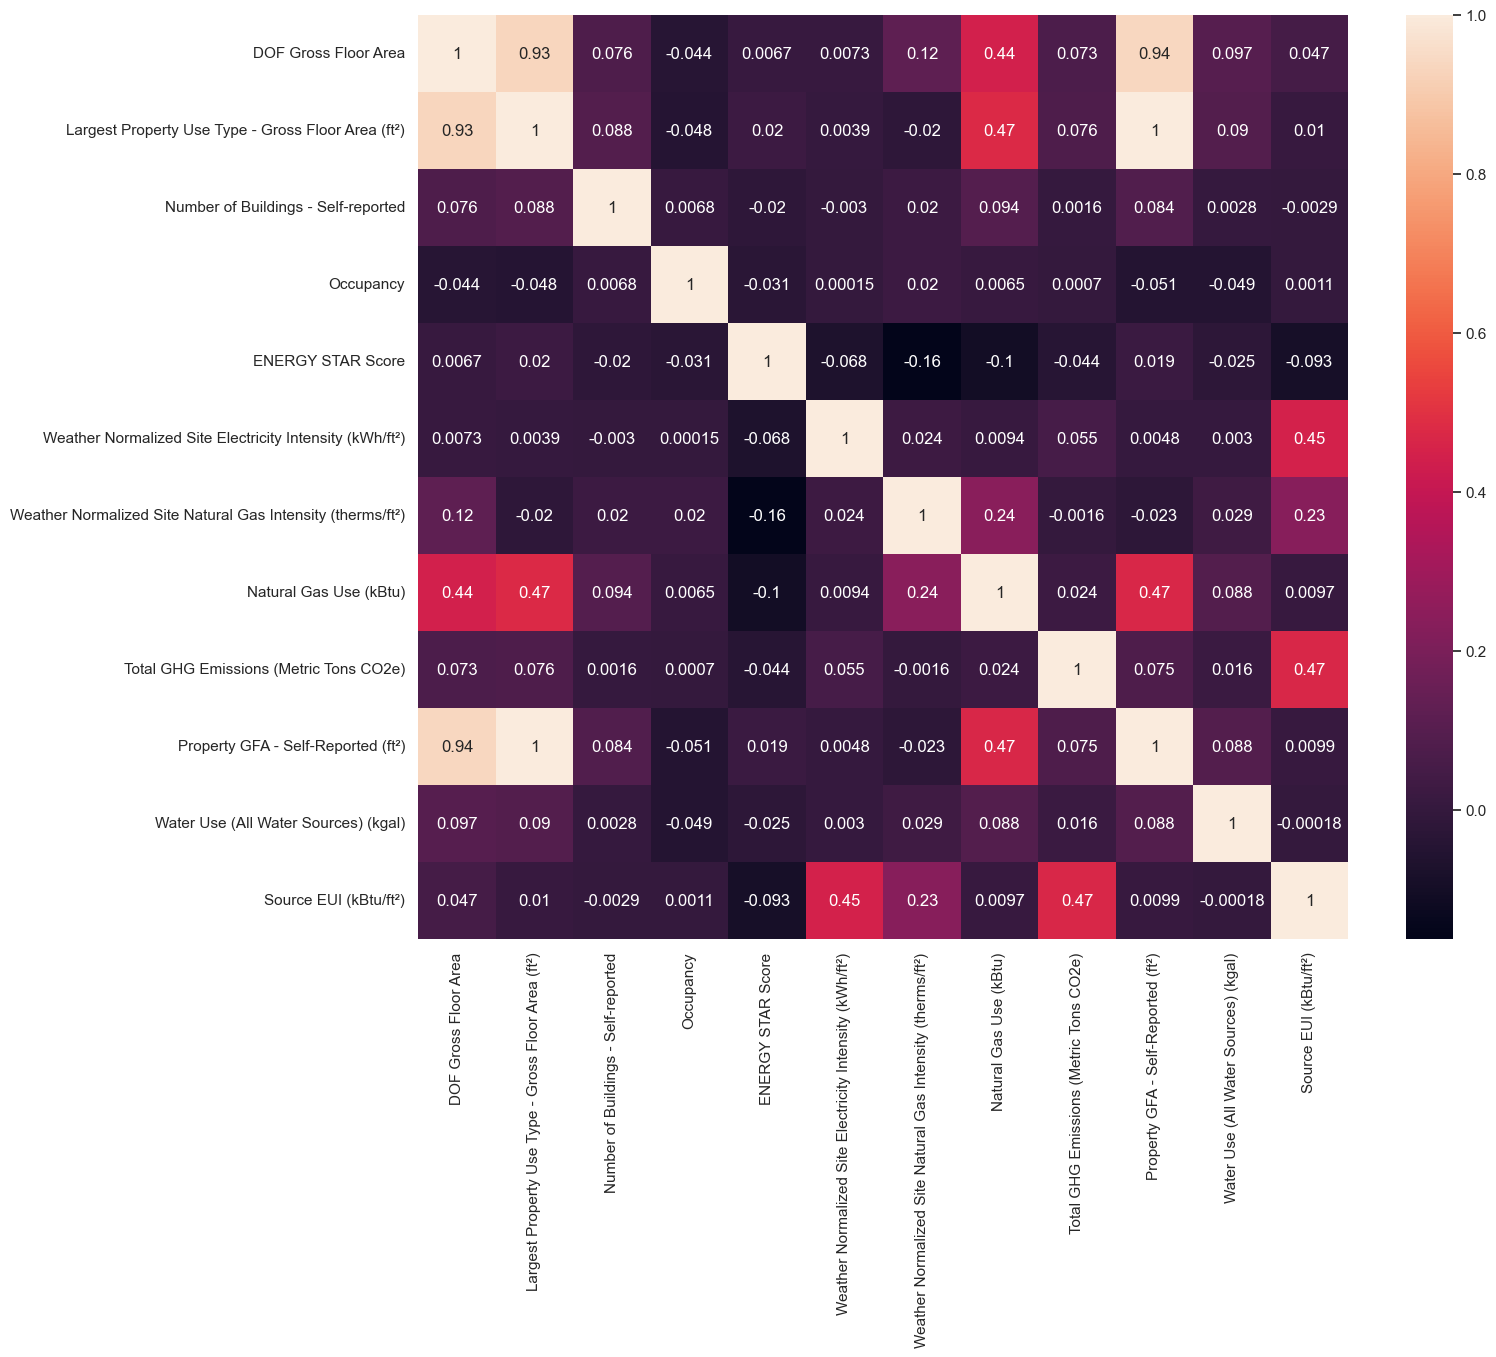

In [24]:
sns.heatmap(corr_features_area.corr(),annot=True)

The high correlation now exists only among area features. There is still a low to moderate correlation even after adding area column but only amongst energy features.


Hence, we will now drop the collinear columns from the original dataset.

In [25]:
#Dropping redundant/correlated columns from original dataset
df = df.drop(columns = ["Site EUI (kBtu/ft²)","Weather Normalized Site EUI (kBtu/ft²)",
                                                       "Electricity Use - Grid Purchase (kBtu)","Weather Normalized Site Electricity (kWh)",
                                                       "Weather Normalized Source EUI (kBtu/ft²)","Water Intensity (All Water Sources) (gal/ft²)",
                                                       "Indirect GHG Emissions (Metric Tons CO2e)","Direct GHG Emissions (Metric Tons CO2e)",
                                                       "Weather Normalized Site Natural Gas Use (therms)"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9561 entries, 1 to 11745
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9513 non-null   object 
 1   DOF Gross Floor Area                                        9513 non-null   float64
 2   List of All Property Use Types at Property                  9561 non-null   object 
 3   Largest Property Use Type                                   9561 non-null   object 
 4   Largest Property Use Type - Gross Floor Area (ft²)          9561 non-null   float64
 5   Number of Buildings - Self-reported                         9561 non-null   int64  
 6   Occupancy                                                   9561 non-null   int64  
 7   ENERGY STAR Score                                           9561 non-null   float64
 8

Next, we check the influence of Property Types on ENERGY STAR Scores and Water Usage.

In [27]:
df["Largest Property Use Type"].value_counts()

Multifamily Housing                      7474
Office                                   1188
Hotel                                     215
Non-Refrigerated Warehouse                159
Senior Care Community                      92
K-12 School                                92
Residence Hall/Dormitory                   86
Distribution Center                        62
Retail Store                               62
Hospital (General Medical & Surgical)      40
Medical Office                             28
Supermarket/Grocery Store                  19
Financial Office                           15
Worship Facility                            9
Refrigerated Warehouse                      9
Wholesale Club/Supercenter                  4
Parking                                     3
Bank Branch                                 2
Courthouse                                  2
Name: Largest Property Use Type, dtype: int64

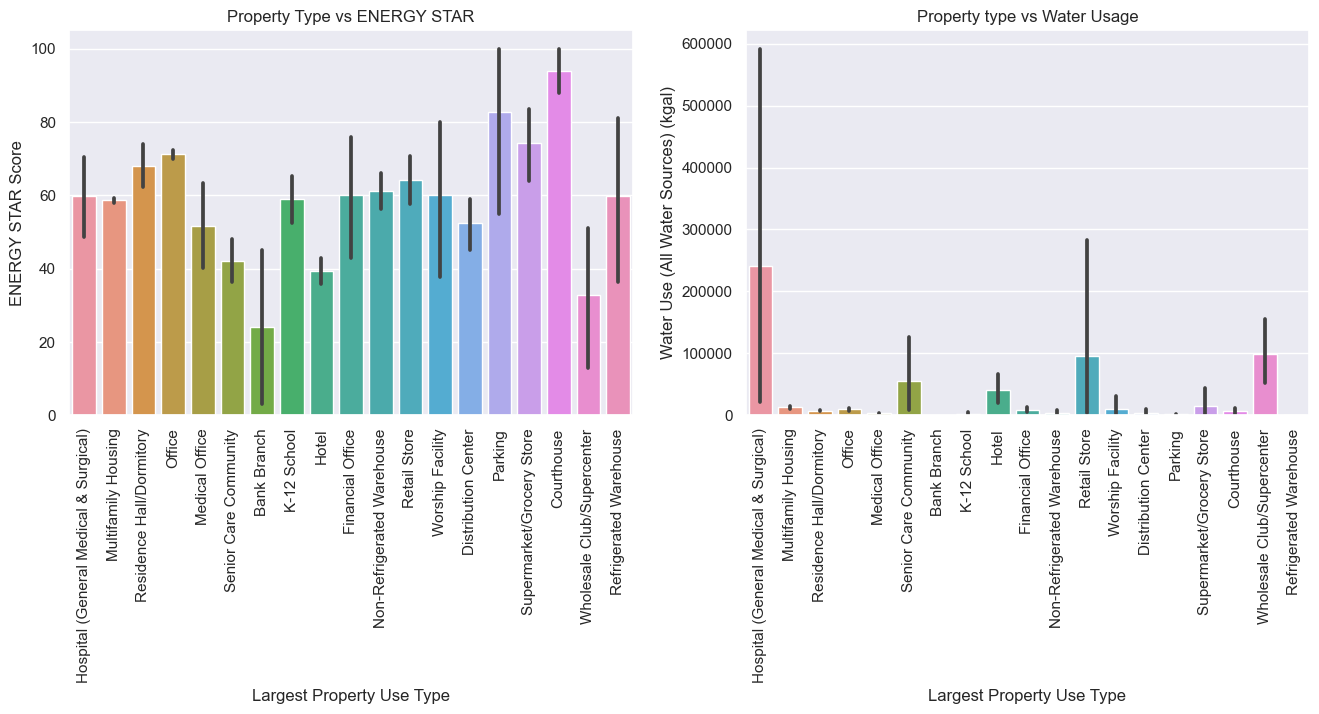

In [28]:
f,axes=plt.subplots(1,2,figsize=(16,5))
sns.barplot(x=df["Largest Property Use Type"],y=df["ENERGY STAR Score"],ax=axes[0]).set(title="Property Type vs ENERGY STAR")

sns.barplot(x=df["Largest Property Use Type"],y=df["Water Use (All Water Sources) (kgal)"],ax=axes[1]).set(title="Property type vs Water Usage")
#plt.xticks(rotation=90)
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)


The distribution of Property Types in relation to ENERGY STAR Score is as above. 

The Water Usage according to Property type has large number of outliers.

We will now check the relationship between the area features.

<Axes: xlabel='DOF Gross Floor Area', ylabel='Property GFA - Self-Reported (ft²)'>

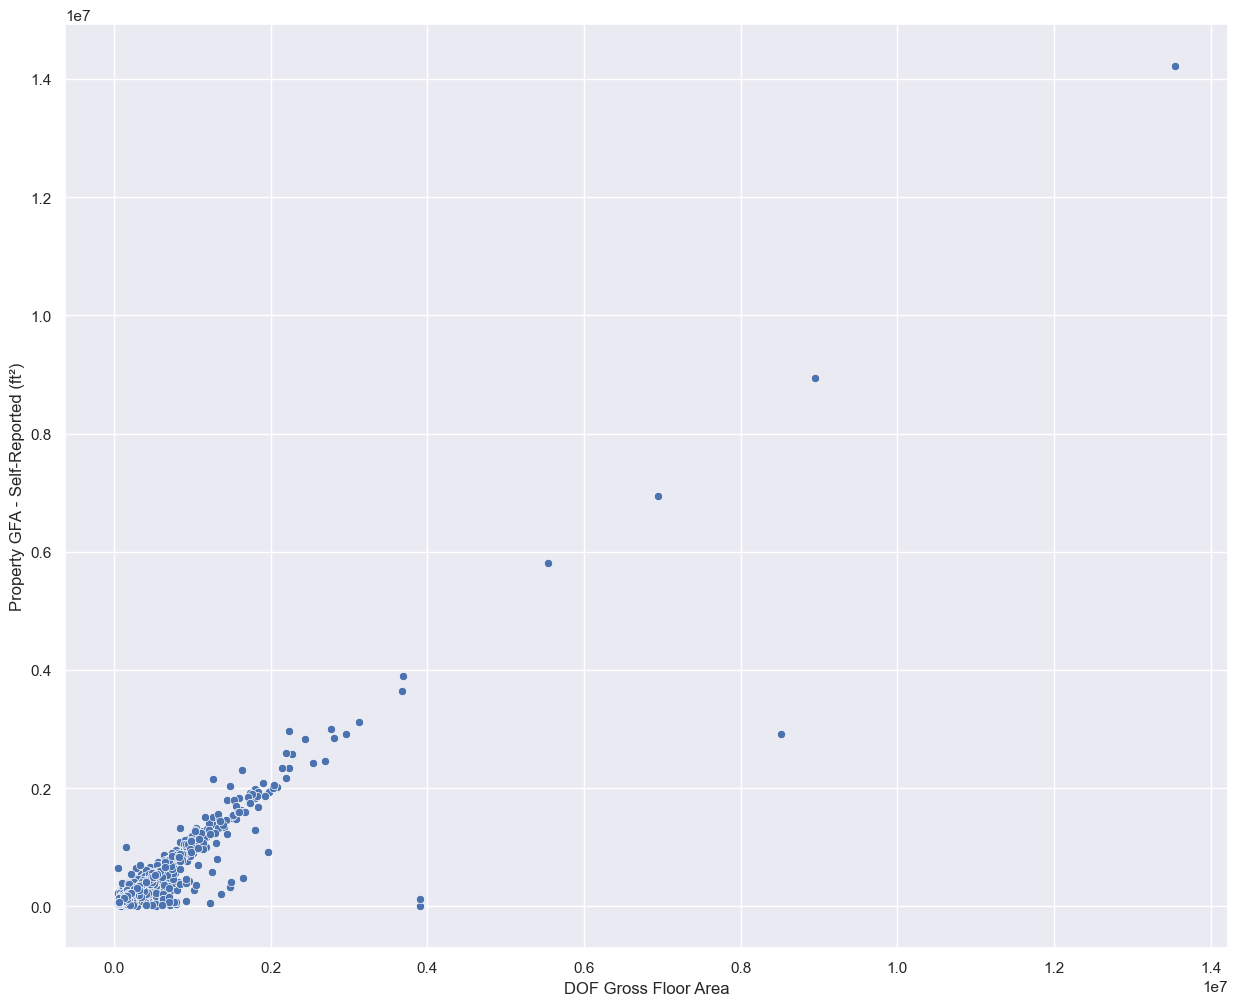

In [29]:
sns.scatterplot(x=df["DOF Gross Floor Area"],y=df["Property GFA - Self-Reported (ft²)"])

There is a linear relationship between the above two features. Hence, DOF Gross Floor Area can be dropped

<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)', ylabel='Property GFA - Self-Reported (ft²)'>

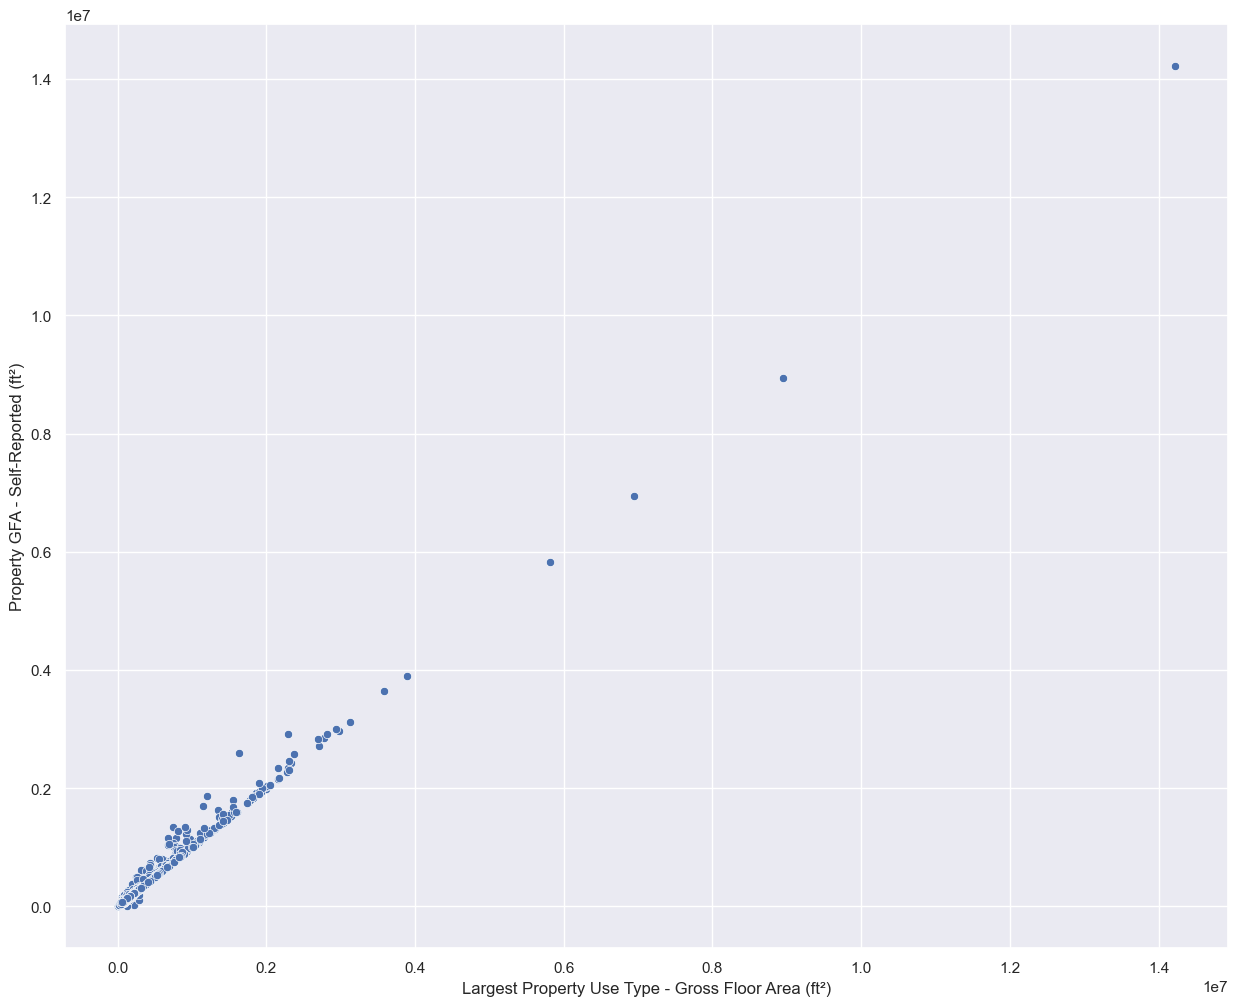

In [30]:
sns.scatterplot(x=df["Largest Property Use Type - Gross Floor Area (ft²)"],y=df["Property GFA - Self-Reported (ft²)"])

There is also a linear relationship between above two features. Hence, we can drop self reported feature.

In [31]:
#Dropping redundant area columns
df = df.drop(columns = ["DOF Gross Floor Area","List of All Property Use Types at Property","Property GFA - Self-Reported (ft²)"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9561 entries, 1 to 11745
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9513 non-null   object 
 1   Largest Property Use Type                                   9561 non-null   object 
 2   Largest Property Use Type - Gross Floor Area (ft²)          9561 non-null   float64
 3   Number of Buildings - Self-reported                         9561 non-null   int64  
 4   Occupancy                                                   9561 non-null   int64  
 5   ENERGY STAR Score                                           9561 non-null   float64
 6   Weather Normalized Site Electricity Intensity (kWh/ft²)     9076 non-null   float64
 7   Weather Normalized Site Natural Gas Intensity (therms/ft²)  8157 non-null   float64
 8

In [33]:
df.isnull().sum()

Borough                                                         48
Largest Property Use Type                                        0
Largest Property Use Type - Gross Floor Area (ft²)               0
Number of Buildings - Self-reported                              0
Occupancy                                                        0
ENERGY STAR Score                                                0
Weather Normalized Site Electricity Intensity (kWh/ft²)        485
Weather Normalized Site Natural Gas Intensity (therms/ft²)    1404
Natural Gas Use (kBtu)                                         994
Total GHG Emissions (Metric Tons CO2e)                           3
Water Use (All Water Sources) (kgal)                          3079
Source EUI (kBtu/ft²)                                            0
Water Required?                                                  0
dtype: int64



We will drop the values with lesser number of missing values.

In [34]:
df = df.dropna(subset = ["Borough","Total GHG Emissions (Metric Tons CO2e)"])


We choose to impute larger number of missing values with 0.0 as they are technical data which are basically readings taken from the given building. If we impute with mean or median, we may unintentionally falsify the data or outcomes. If we drop these rows, our dataset will be reduced to almost half of its original size and we may not be able to train enough data. Hence, we will replace the remaining NaN values with 0.0.

Here we will store values in a fresh dataset for further processing which will be our final dataset.

In [35]:
#Final Dataset
df_final=df

df_final = df_final.reset_index()
df_final=df_final.drop(columns=["index"])

In [36]:

df_final=df_final.replace(np.nan,0.0)

In [37]:
df_final.head()

,Borough,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Source EUI (kBtu/ft²),Water Required?
0,Manhattan,Hospital (General Medical & Surgical),3889181.0,12,100,55.0,24.8,2.4,9.330734e+08,55870.4,0.0,404.3,No
1,Manhattan,Hospital (General Medical & Surgical),2971874.0,12,100,55.0,8.3,4.8,1.432251e+09,54429.8,0.0,414.2,No
2,Manhattan,Multifamily Housing,116744.0,1,100,80.0,2.6,0.0,3.267606e+05,689.0,0.0,97.7,Yes
3,Manhattan,Multifamily Housing,54913.0,1,100,100.0,4.8,0.0,5.941290e+04,88.8,231.9,53.9,Yes
4,Queens,Multifamily Housing,228570.0,6,100,99.0,4.9,0.1,1.919800e+06,464.0,0.0,62.4,Yes


In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9510 entries, 0 to 9509
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9510 non-null   object 
 1   Largest Property Use Type                                   9510 non-null   object 
 2   Largest Property Use Type - Gross Floor Area (ft²)          9510 non-null   float64
 3   Number of Buildings - Self-reported                         9510 non-null   int64  
 4   Occupancy                                                   9510 non-null   int64  
 5   ENERGY STAR Score                                           9510 non-null   float64
 6   Weather Normalized Site Electricity Intensity (kWh/ft²)     9510 non-null   float64
 7   Weather Normalized Site Natural Gas Intensity (therms/ft²)  9510 non-null   float64
 8 

Next, we will encode categorical features.

In [39]:
cat_cols = df_final[["Borough","Largest Property Use Type","Water Required?"]]


We separate out the categorical columns in a different dataset and do one hot encoding.

In [40]:
#One hot encoding categorical features
dummy_cols = pd.get_dummies(cat_cols)

In [41]:
df_final = pd.concat([df_final,dummy_cols],axis=1)

In [42]:
df_final

,Borough,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Total GHG Emissions (Metric Tons CO2e),...,Largest Property Use Type_Parking,Largest Property Use Type_Refrigerated Warehouse,Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Retail Store,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Water Required?_No,Water Required?_Yes
0,Manhattan,Hospital (General Medical & Surgical),3889181.0,12,100,55.0,24.8,2.4,9.330734e+08,55870.4,...,0,0,0,0,0,0,0,0,1,0
1,Manhattan,Hospital (General Medical & Surgical),2971874.0,12,100,55.0,8.3,4.8,1.432251e+09,54429.8,...,0,0,0,0,0,0,0,0,1,0
2,Manhattan,Multifamily Housing,116744.0,1,100,80.0,2.6,0.0,3.267606e+05,689.0,...,0,0,0,0,0,0,0,0,0,1
3,Manhattan,Multifamily Housing,54913.0,1,100,100.0,4.8,0.0,5.941290e+04,88.8,...,0,0,0,0,0,0,0,0,0,1
4,Queens,Multifamily Housing,228570.0,6,100,99.0,4.9,0.1,1.919800e+06,464.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,Staten Island,Supermarket/Grocery Store,42064.0,1,100,70.0,37.5,0.4,2.773100e+06,1050.9,...,0,0,0,0,0,1,0,0,0,1
9506,Bronx,Multifamily Housing,67350.0,1,100,83.0,4.6,0.9,5.511800e+06,413.7,...,0,0,0,0,0,0,0,0,0,1
9507,Bronx,Multifamily Housing,72372.0,1,100,83.0,5.0,0.8,5.593400e+06,416.3,...,0,0,0,0,0,0,0,0,1,0
9508,Bronx,Multifamily Housing,131802.0,1,100,100.0,2.8,0.0,2.916000e+05,137.6,...,0,0,0,0,0,0,0,0,1,0


In [43]:
#Dropping redundant columns after one-hot encoding
df_final = df_final.drop(columns = ["Borough","Largest Property Use Type","Water Required?"])

In [44]:
df_final.isnull().sum()

Largest Property Use Type - Gross Floor Area (ft²)                 0
Number of Buildings - Self-reported                                0
Occupancy                                                          0
ENERGY STAR Score                                                  0
Weather Normalized Site Electricity Intensity (kWh/ft²)            0
Weather Normalized Site Natural Gas Intensity (therms/ft²)         0
Natural Gas Use (kBtu)                                             0
Total GHG Emissions (Metric Tons CO2e)                             0
Water Use (All Water Sources) (kgal)                               0
Source EUI (kBtu/ft²)                                              0
Borough_Bronx                                                      0
Borough_Brooklyn                                                   0
Borough_Manhattan                                                  0
Borough_Queens                                                     0
Borough_Staten Island             

In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9510 entries, 0 to 9509
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Largest Property Use Type - Gross Floor Area (ft²)               9510 non-null   float64
 1   Number of Buildings - Self-reported                              9510 non-null   int64  
 2   Occupancy                                                        9510 non-null   int64  
 3   ENERGY STAR Score                                                9510 non-null   float64
 4   Weather Normalized Site Electricity Intensity (kWh/ft²)          9510 non-null   float64
 5   Weather Normalized Site Natural Gas Intensity (therms/ft²)       9510 non-null   float64
 6   Natural Gas Use (kBtu)                                           9510 non-null   float64
 7   Total GHG Emissions (Metric Tons CO2e)    

All missing values have been dealt with. Our final dataset is ready for the next stage.

### Model Building and evaluation

In [46]:
#Importing models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
X =df_final.drop(columns = ["ENERGY STAR Score"])
y = df_final["ENERGY STAR Score"]

As One Hot Encoding has increased our number of features, we want to check feature importances first, so that we can drop some columns with less importance.

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [49]:
fi=rfc.feature_importances_
xc = X.columns

<Axes: >

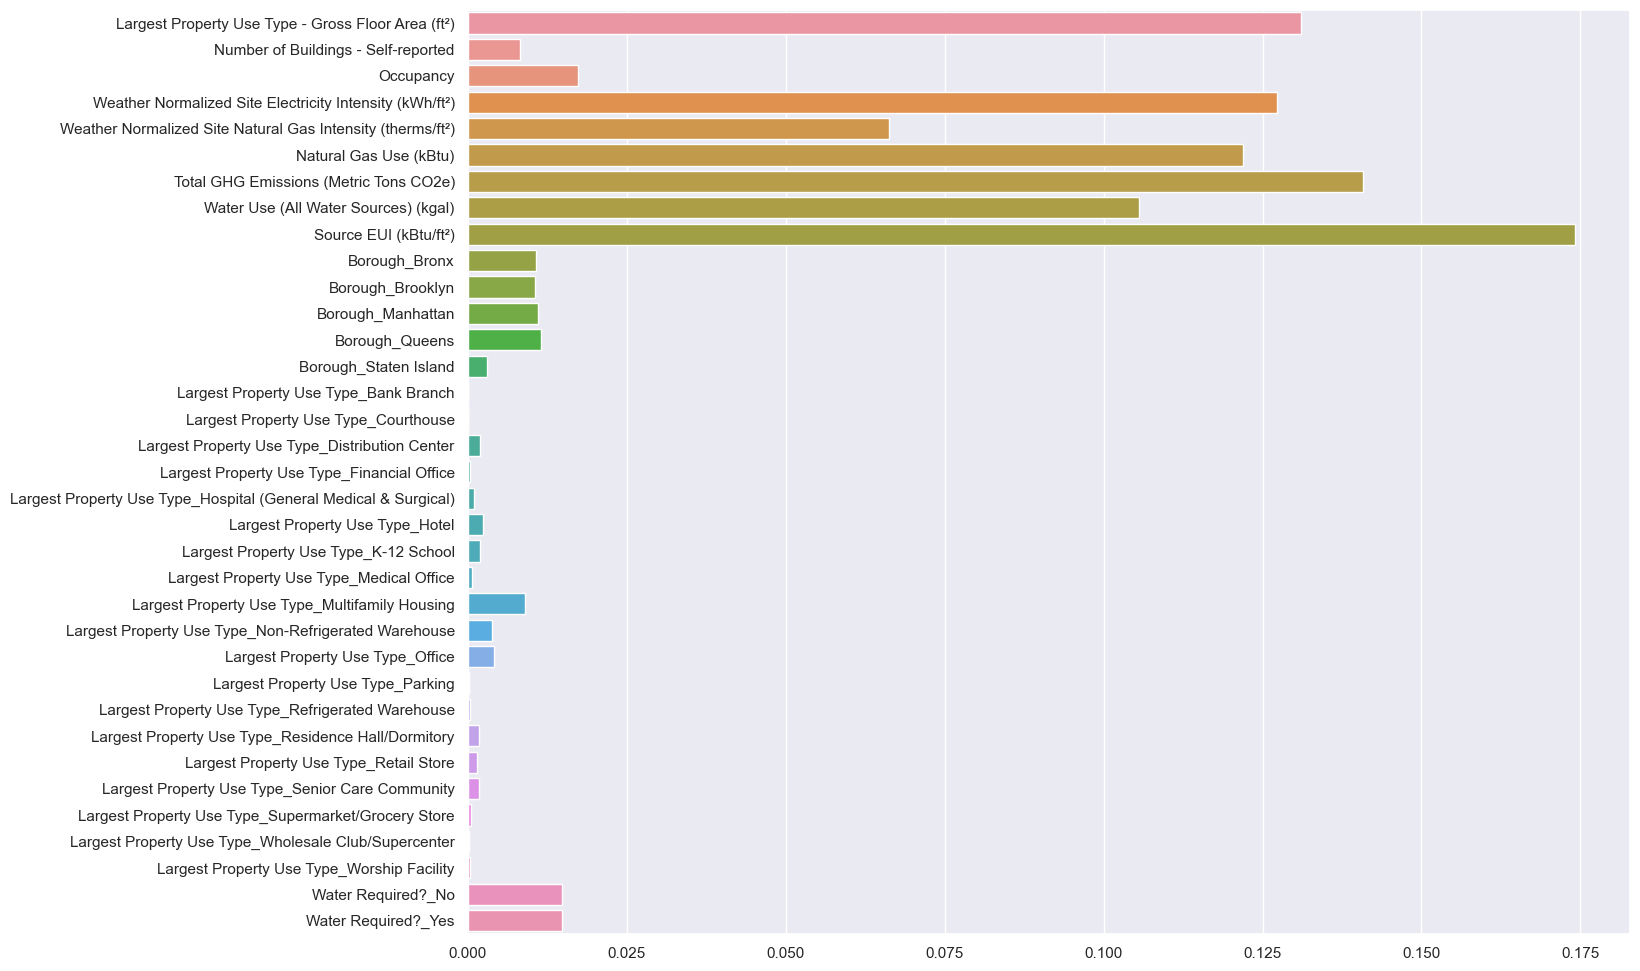

In [50]:
sns.barplot(y=xc,x=fi)

As per the above feature importance plot, we will drop some columns with very low importance

In [51]:
#Dropping features with least importance
X = X.drop(columns = ['Borough_Staten Island',"Largest Property Use Type_Bank Branch",
       
       'Largest Property Use Type_Courthouse',
       'Largest Property Use Type_Distribution Center',
       'Largest Property Use Type_Financial Office',
       'Largest Property Use Type_Hospital (General Medical & Surgical)','Largest Property Use Type_K-12 School',
       'Largest Property Use Type_Medical Office','Largest Property Use Type_Non-Refrigerated Warehouse','Largest Property Use Type_Parking',
       'Largest Property Use Type_Refrigerated Warehouse','Largest Property Use Type_Senior Care Community',
       'Largest Property Use Type_Supermarket/Grocery Store',
       'Largest Property Use Type_Wholesale Club/Supercenter',
       'Largest Property Use Type_Worship Facility'
                     ])

Next, we will Standardize our data.

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(X)

In [53]:
#Standardizing data using MinMaxScaler
cols = X.columns
X = pd.DataFrame(sc, columns = cols)

Split the data using train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 23)

We will use 4 different algorithms for the given data and see their performances.

In [55]:
model1 = LinearRegression()
model2 = SVR()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()

In [83]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

GradientBoostingRegressor()

In [84]:
y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)
y3_pred = model3.predict(X_test)
y4_pred = model4.predict(X_test)

We use r2_score, root mean squared error and mean absolute error to check the performances of our models.

In [85]:
from sklearn.metrics import mean_squared_error,r2_score
#For model 1, i.e., Linear Regression
mse1 = mean_squared_error(y_test, y1_pred)
r2s1 = r2_score(y_test, y1_pred)
print(f"The Mean Square Error for {model1} is {mse1}")

The Mean Square Error for LinearRegression() is 1589.8860937226166


In [86]:
#For model 2, i.e., Support Vector Regressor (SVR)

mse2 = mean_squared_error(y_test, y2_pred)
r2s2 = r2_score(y_test, y2_pred)
print(f"The Mean Square Error for {model2} is {mse2}")

The Mean Square Error for SVR() is 870.0781971556535


In [87]:
#For model 3, i.e., Random FOrest Regressor
mse3 = mean_squared_error(y_test, y3_pred)
r2s3 = r2_score(y_test, y3_pred)
print(f"The Mean Square Error for {model3} is {mse3}")

The Mean Square Error for RandomForestRegressor() is 179.00166431865094


In [88]:
#For model 4, i.e., Gradient BOosting Regressor

mse4 = mean_squared_error(y_test, y4_pred)
r2s4 = r2_score(y_test, y4_pred)
print(f"The Mean Square Error for {model4} is {mse4}")

The Mean Square Error for GradientBoostingRegressor() is 178.42674777031525


In [89]:
#Root mean Squared Errors
import math


rmse1 = math.sqrt(mse1)
rmse2 = math.sqrt(mse2)
rmse3 = math.sqrt(mse3)
rmse4 = math.sqrt(mse4)
print(f"The Root Mean Square Error for {model1} is {rmse1}")
print(f"The Root Mean Square Error for {model2} is {rmse2}")
print(f"The Root Mean Square Error for {model3} is {rmse3}")
print(f"THe Root Mean Square Error for {model4} is {rmse4}")

The Root Mean Square Error for LinearRegression() is 39.873375750274974
The Root Mean Square Error for SVR() is 29.49708794365392
The Root Mean Square Error for RandomForestRegressor() is 13.379150358623336
THe Root Mean Square Error for GradientBoostingRegressor() is 13.357647538781492


In [90]:
#Checking r2 scores
print(f"The r2 score for {model1} is {r2s1}")
print(f"The r2 score for {model2} is {r2s2}")
print(f"The r2 score for {model3} is {r2s3}")
print(f"THe r2 score for {model4} is {r2s4}")

The r2 score for LinearRegression() is -0.8081339280894251
The r2 score for SVR() is 0.010483886500052386
The r2 score for RandomForestRegressor() is 0.7964263076978048
THe r2 score for GradientBoostingRegressor() is 0.7970801445487403


In [91]:
#Checking Mean Absolute Error
from sklearn.metrics import mean_absolute_error

print(f"The Mean Absolute Error for {model1} is {mean_absolute_error(y_test, y1_pred)}")
print(f"The Mean Absolute Error for {model2} is {mean_absolute_error(y_test, y2_pred)}")
print(f"The Mean Absolute Error for {model3} is {mean_absolute_error(y_test, y3_pred)}")
print(f"The Mean Absolute Error for {model4} is {mean_absolute_error(y_test, y4_pred)}")

The Mean Absolute Error for LinearRegression() is 24.16618471784087
The Mean Absolute Error for SVR() is 24.250290710000343
The Mean Absolute Error for RandomForestRegressor() is 9.372941932468747
The Mean Absolute Error for GradientBoostingRegressor() is 9.484618420568095


As we can see, GradientBoostingRegressor() has performed the best with the highest r2 score of 0.797 followed by RandomForestRegressor() with r2 score of 0.796.

We will check our average score for Gradient Boosting model through Cross Validation technique.

### Using Cross Validation

In [65]:
scores = cross_val_score(model4,X,y,cv=10,scoring="neg_mean_squared_error")
avg = scores.mean()
   
print(avg)

-183.17459627453957


The average Mean Squared Error is around 183 using Cross Validation which is more than our mean squared error value of our test dataset.

Hence, we will do Hyperparameter tuning to see if we can further reduce this value.

### Hyper Parameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {"loss":["squared_error","huber"],
              "n_estimators":[30,50,100,180,200],
             "max_depth":[3,4,5,6,7]}

In [68]:
grid = GridSearchCV(model4, param_grid,cv=10,scoring="neg_mean_squared_error")

In [69]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['squared_error', 'huber'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [30, 50, 100, 180, 200]},
             scoring='neg_mean_squared_error')

In [70]:
grid.best_params_

{'loss': 'squared_error', 'max_depth': 4, 'n_estimators': 100}

In [71]:
grid.best_score_

-179.6890491847044

We can see that the average cross validation score has improved after hyperparameter tuning. Hence, we will finalize the model with the tuned parameters.

### Final model fitting

In [92]:
final_model = GradientBoostingRegressor(loss="squared_error",max_depth=4,n_estimators=100)
final_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4)

In [93]:
y_pred_final = final_model.predict(X_test)

In [94]:
#Mean Squared Error
final_mse = mean_squared_error(y_test, y_pred_final)
print(f"The Mean Square Error for {final_model} is {final_mse}")

#Root Mean Squared Error
final_rmse = math.sqrt(final_mse)
print(f"The Root Mean Square Error for {final_model} is {final_rmse}")

#Mean Absolute Error
print(f"The Mean Absolute Error for {final_model} is {mean_absolute_error(y_test, y_pred_final)}")

#r2 Score
final_r2score = r2_score(y_test, y_pred_final)
print(f"The r2 score for {final_model} is {final_r2score}")



The Mean Square Error for GradientBoostingRegressor(max_depth=4) is 174.34823068462023
The Root Mean Square Error for GradientBoostingRegressor(max_depth=4) is 13.204099010709523
The Mean Absolute Error for GradientBoostingRegressor(max_depth=4) is 9.32928841693353
The r2 score for GradientBoostingRegressor(max_depth=4) is 0.8017185303727654



The mean absolute error is around 9 and mean squared error is around 174 after hyperparameter tuning. There is marginal improvement in the metrics after Hyperparameter tuning.

### Conclusion

It can be concluded that the above model for predicting ENERGY STAR Score has the ability to account for 80% variance as per the r2 score calculated. It may also be said that the model has 80% capability of predicting the outcome. Hence, it can be presumed that the model may be able to account for 70%-75% variance on completely unknown data.

